In [3]:

##Recommend commercial instead of private

In [4]:
import pandas as pd
df = pd.read_csv("project_data/Aviation_Data.csv")

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Coerce date into pandas date time object

df["Event.Date"] = pd.to_datetime(df['Event.Date'], format='%Y-%m-%d', errors = 'coerce')


In [7]:
df_clean = df.dropna(subset=['Event.Id'])


In [8]:
# After dropping rows where Event.Id null,
# We now have a dataset where first 4 columns have no nulls
# We think this makes sense because without an id or accident number, the event wasn't properly documented
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          15230
dtype: i

In [9]:
##Create a dataframe that only contains data from the last 30 years
df_30 = df_clean[df_clean['Event.Date'] >= '1993-01-01']

In [10]:
##Sanity check, make sure we are only dealing with data from the last 30 years
print(df_30['Event.Date'].min())
print(df_30['Event.Date'].max())

1993-01-01 00:00:00
2022-12-29 00:00:00


In [11]:
##create a new column that calculates the total number of injuries. 
##They have them split into 3 categories (fatal, minor, and serious) without a total.
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Serious.Injuries']

In [12]:
##Outside data to grab for certain models: Cost and Capacity, can divide total injured by capacity to find injury rate

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [14]:
##checking for duplicates by Event.Id
df_clean['Event.Id'].nunique()

87951

In [15]:
##Dropping the duplicates
df_clean1 = df_clean.drop_duplicates(subset=['Event.Id'])

In [16]:
##Cleaning the Make column: all lowercase
df_clean1['Make'] = df_clean1['Make'].str.lower()

<ipython-input-16-f435589ba447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1['Make'] = df_clean1['Make'].str.lower()


In [17]:
##Capitalize each word
df_clean1['Make'] = df_clean1['Make'].str.title()

<ipython-input-17-9309ec45cd0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1['Make'] = df_clean1['Make'].str.title()


In [18]:
##Get rid of whitespace
df_clean1['Make'] = df_clean1['Make'].str.strip()

<ipython-input-18-29db5f22d264>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1['Make'] = df_clean1['Make'].str.strip()


In [19]:
##clean model column starting by making everything uppercase
df_clean1['Model'] = df_clean1['Model'].str.upper()

<ipython-input-19-38a9686ac8ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1['Model'] = df_clean1['Model'].str.upper()


In [20]:
##get rid of whitespace
df_clean1['Model'] = df_clean1['Model'].str.strip()

<ipython-input-20-a78600e353ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1['Model'] = df_clean1['Model'].str.strip()


In [21]:
df_clean1['Model'].nunique()

11563

In [22]:
df_clean1['Make'].nunique()

7552

In [23]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Investigation.Type      87951 non-null  object        
 2   Accident.Number         87951 non-null  object        
 3   Event.Date              87951 non-null  datetime64[ns]
 4   Location                87899 non-null  object        
 5   Country                 87729 non-null  object        
 6   Latitude                34212 non-null  object        
 7   Longitude               34203 non-null  object        
 8   Airport.Code            49601 non-null  object        
 9   Airport.Name            52117 non-null  object        
 10  Injury.Severity         86961 non-null  object        
 11  Aircraft.damage         84848 non-null  object        
 12  Aircraft.Category       32181 non-null  object

In [24]:
df_clean1['Aircraft.Category'].isna().sum()

55770

In [25]:
df_clean1['Aircraft.Category'].fillna('n/a', inplace=True)

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
df_clean2 = df_clean1.loc[(df_clean1['Aircraft.Category'] == 'Airplane') | (df_clean1['Aircraft.Category'] == 'n/a')]

In [27]:
##Sanity check
df_clean2['Aircraft.Category'].value_counts()

n/a         55770
Airplane    27520
Name: Aircraft.Category, dtype: int64

In [28]:
#Concatenate Make and Model:
df_clean2["Make.Model"] = df_clean2['Make'].astype(str) +"_"+ df_clean2["Model"]

<ipython-input-28-dab208b01915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2["Make.Model"] = df_clean2['Make'].astype(str) +"_"+ df_clean2["Model"]


In [29]:
#Divide dataframe into two: one where Airport.Category = “Airplane” and one where = ‘n/a’
df_plane = df_clean2[df_clean2['Aircraft.Category'] == 'Airplane']
df_na = df_clean2[df_clean2['Aircraft.Category'] == 'n/a']


In [30]:
#Create Pandas data series containing only those unique categories of Make.Model in df_plane:
df_plane_cat = df_plane['Make.Model']


In [31]:
##Suggestion = Avoid business with personal airplanes and planes used for instructing
df_clean2['Purpose.of.flight'].value_counts(normalize=True)

Personal                     0.609931
Instructional                0.125661
Unknown                      0.081707
Aerial Application           0.056089
Business                     0.048911
Positioning                  0.018465
Other Work Use               0.013072
Ferry                        0.010106
Public Aircraft              0.008822
Aerial Observation           0.007936
Executive/corporate          0.006703
Flight Test                  0.004494
Skydiving                    0.002311
Banner Tow                   0.001297
Air Race show                0.000963
Public Aircraft - Federal    0.000963
Air Race/show                0.000629
Glider Tow                   0.000539
Public Aircraft - State      0.000437
Firefighting                 0.000295
Public Aircraft - Local      0.000257
External Load                0.000231
Air Drop                     0.000077
ASHO                         0.000064
PUBS                         0.000039
Name: Purpose.of.flight, dtype: float64

In [32]:
##Create a list of the top 5 purposes of flights
Purpose_Frequencies = df_clean2['Purpose.of.flight'].value_counts()
Top_Purposes = list(Purpose_Frequencies.index[0:5])
Top_Purposes

['Personal', 'Instructional', 'Unknown', 'Aerial Application', 'Business']

In [33]:
##Create a list of the counts of the top 5 purposes of flights
Top_Purpose_Counts = list(Purpose_Frequencies.values[0:5])
Top_Purpose_Counts

[47499, 9786, 6363, 4368, 3809]

In [34]:
import matplotlib.pyplot as plt 
import numpy as np

<ipython-input-35-1aee3a7d0dba>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45);


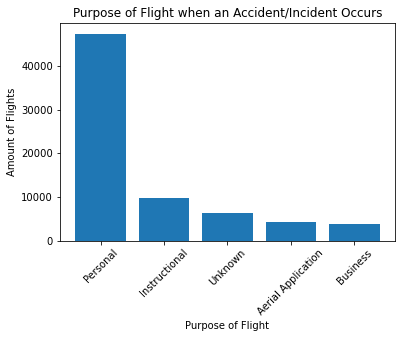

In [35]:
fig, ax = plt.subplots()

x = Top_Purposes
y = Top_Purpose_Counts

ax.bar(x, y)
ax.set_title('Purpose of Flight when an Accident/Incident Occurs')
ax.set_ylabel('Amount of Flights')
ax.set_xlabel('Purpose of Flight')
ax.set_xticklabels(x, rotation=45);